In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        # plt.imshow(img[:,:,::-1]);
        plt.imshow(img);
    plt.show()

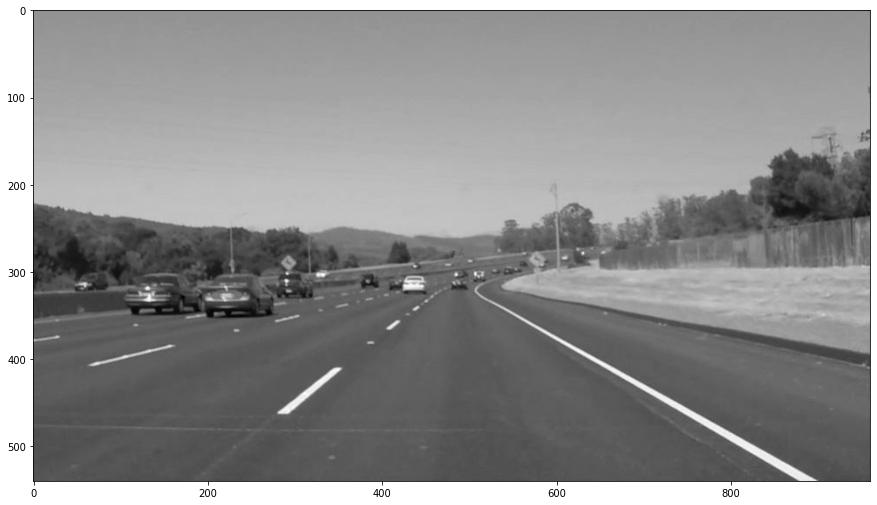

In [3]:
img = cv2.imread("Test/test_images/solidWhiteCurve.jpg")
img = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15,10));
plt.imshow(gray_img, cmap='gray')


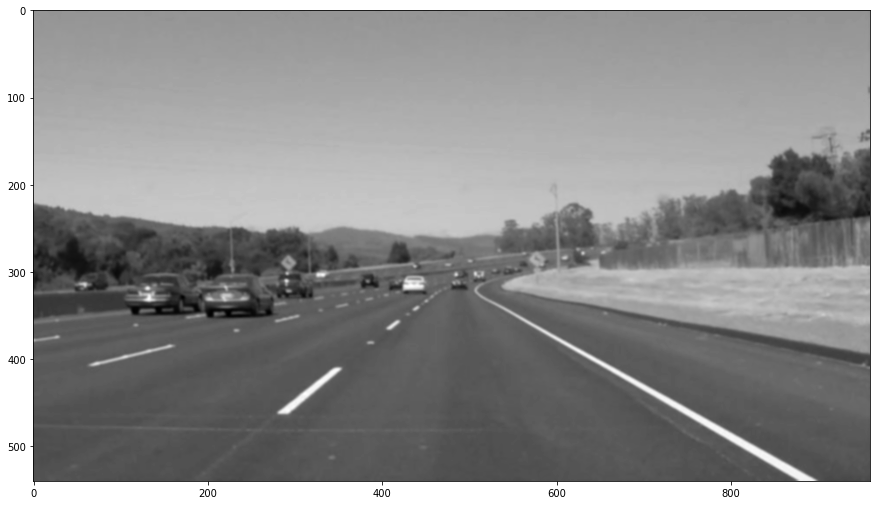

In [4]:
#blur = cv2.medianBlur(dst,21)
blur = cv2.GaussianBlur(gray_img,(5,5),1)
#_,thresh = cv2.threshold(blur,128,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(15,10));
plt.imshow(blur, cmap='gray')

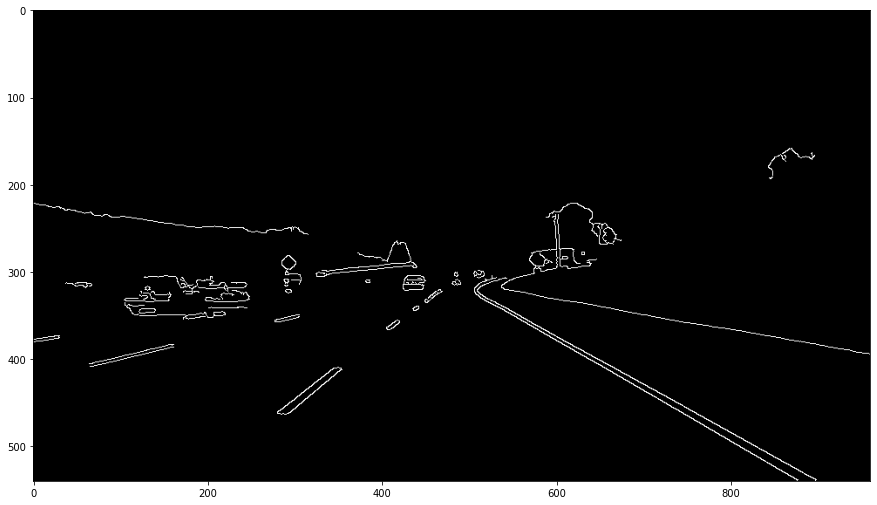

In [5]:
edges = cv2.Canny(blur, 1, 255, apertureSize=3)
plt.figure(figsize=(15,10));
plt.imshow(edges, cmap='gray')


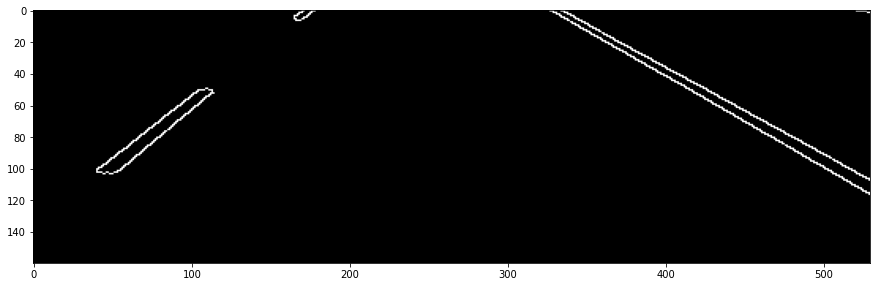

In [6]:
ROI = edges[360:520, 240:770]

plt.figure(figsize=(15,10));
plt.imshow(ROI, cmap='gray')

In [7]:
dst = ROI

In [8]:
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

In [31]:
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
    
cv2.imshow("Source", gray_img)
cv2.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
    
cv2.waitKey()
return 0

SyntaxError: 'return' outside function (<ipython-input-31-57640eea17d4>, line 28)

In [80]:
image = img.copy()

for line in lines:
    for r, theta in line:
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a * r

        # y0 stores the value rsin(theta)
        y0 = b * r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000 * (-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000 * (a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000 * (-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000 * (a))

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.

        #cv2.line(image, (x1+206+104, y1+239), (x2+206+104, y2+239), (0, 0, 255), 2)
        
        #cv2.line(image, (x1+400, y1+485), (x2, y2), (0, 0, 255), 2)

        cv2.line(image, (x1+x+w, y1+y+h), (x2+x+w, y2+y+h), (0, 0, 255), 2)

In [81]:
cv2.imshow("Image Name", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1